# Housing, Employment, and Income Info
### From American Community Survey (ACS) 5 yr Estimate (2014)
### Puts together a bunch of data from 3 different census tables:
* census_tract
* homes: total housing units
* homes_percent_mortgage: occupied housing units, owner occupied, owned with a mortgage or loan
* homes_percent_clear: occupied housing units, owner occupied, owned free and clear
* homes_percent_rent: occupied housing units, renter occupied
* employment_percent: population 16 years and over in labor force
* income_med: median household income in the past 12 months (in 2014 inflation-adjusted dollars)
* income_med_owner: median household income in the past 12 months (in 2014 inflation-adjusted dollars) for owner-occupied houses
* income_med_renter: median household income in the past 12 months (in 2014 inflation-adjusted dollars) for renter-occupied houses
* cost_med: median monthly housing cost
* cost_med_owner: median monthly housing cost for owner-occupied houses
* cost_med_renter: median monthly housing cost for renter-occupied houses

### Makes some histograms of the above data
### All of this gets output to data_final/sd_housing_employment_income_cleaned.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in housing info
house = pd.read_csv('data/American_FactFinder_census/DEC_10_SF1_QTH1_with_ann.csv',skiprows=[1],dtype={'GEO.id2': str})
# count how many rows we got
print house['GEO.id2'].count()
house

628


,GEO.id,GEO.id2,GEO.display-label,HD01_S01,HD02_S01,HD01_S02,HD02_S02,HD01_S03,HD02_S03,HD01_S04,...,HD01_S47,HD02_S47,HD01_S48,HD02_S48,HD01_S49,HD02_S49,HD01_S50,HD02_S50,HD01_S51,HD02_S51
0,1400000US06073000100,06073000100,"Census Tract 1, San Diego County, California",1397,100.0,1333,95.4,64,4.6,1333,...,0,0.0,0,0.0,0,0.0,5,0.4,0,0.0
1,1400000US06073000201,06073000201,"Census Tract 2.01, San Diego County, California",1047,100.0,992,94.7,55,5.3,992,...,2,0.2,1,0.1,0,0.0,6,0.6,6,0.6
2,1400000US06073000202,06073000202,"Census Tract 2.02, San Diego County, California",2413,100.0,2245,93.0,168,7.0,2245,...,2,0.1,2,0.1,0,0.0,50,2.2,16,0.7
3,1400000US06073000300,06073000300,"Census Tract 3, San Diego County, California",3136,100.0,2871,91.5,265,8.5,2871,...,7,0.2,2,0.1,2,0.1,87,3.0,17,0.6
4,1400000US06073000400,06073000400,"Census Tract 4, San Diego County, California",2288,100.0,2140,93.5,148,6.5,2140,...,3,0.1,7,0.3,0,0.0,53,2.5,19,0.9
5,1400000US06073000500,06073000500,"Census Tract 5, San Diego County, California",1726,100.0,1631,94.5,95,5.5,1631,...,4,0.2,4,0.2,0,0.0,36,2.2,21,1.3
6,1400000US06073000600,06073000600,"Census Tract 6, San Diego County, California",1984,100.0,1862,93.9,122,6.1,1862,...,4,0.2,2,0.1,0,0.0,62,3.3,14,0.8
7,1400000US06073000700,06073000700,"Census Tract 7, San Diego County, California",2479,100.0,2344,94.6,135,5.4,2344,...,6,0.3,3,0.1,0,0.0,82,3.5,31,1.3
8,1400000US06073000800,06073000800,"Census Tract 8, San Diego County, California",2663,100.0,2486,93.4,177,6.6,2486,...,8,0.3,2,0.1,0,0.0,122,4.9,30,1.2
9,1400000US06073000900,06073000900,"Census Tract 9, San Diego County, California",3141,100.0,2972,94.6,169,5.4,2972,...,12,0.4,3,0.1,0,0.0,240,8.1,35,1.2


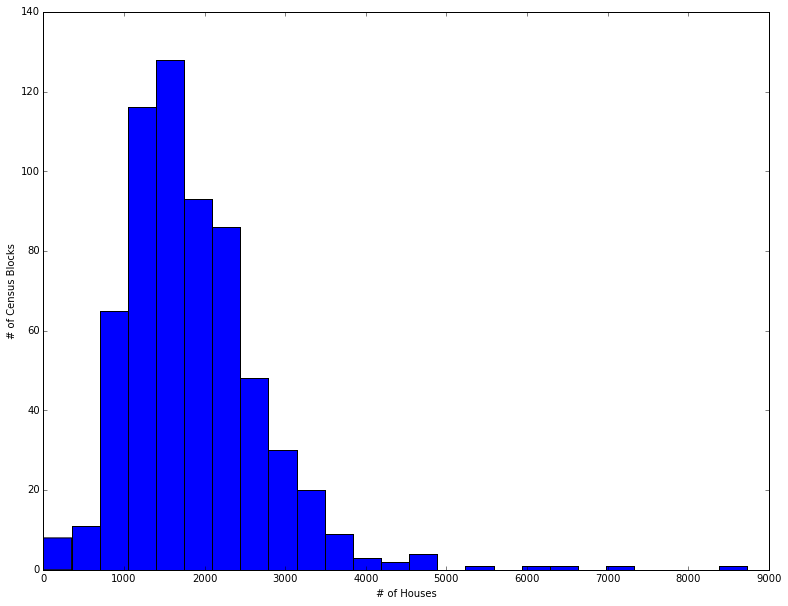

In [3]:
# plot total houses
plt.figure(figsize=(13, 10))
plt.hist(house.HD01_S01,25)
plt.xlabel('# of Houses')
plt.ylabel('# of Census Blocks')
plt.show()

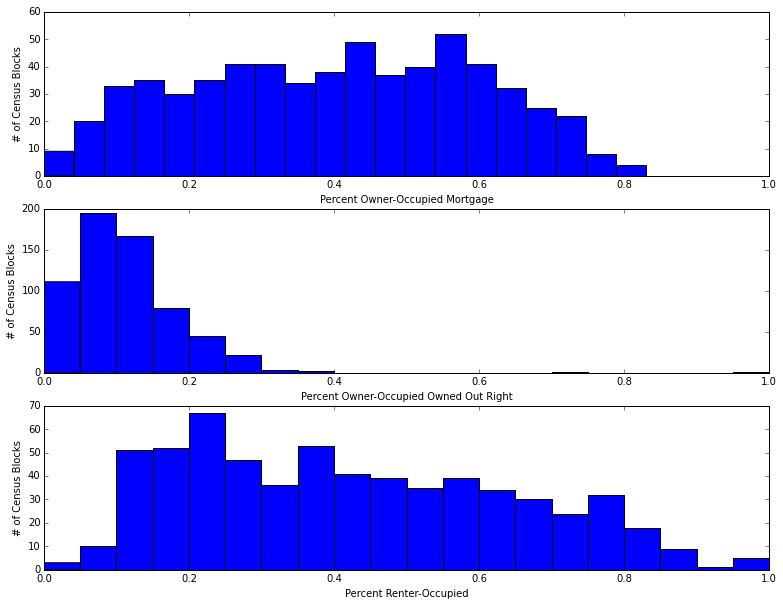

In [4]:
# plot percent occupied by owner vs. renter
plt.figure(figsize=(13, 10))
ax1 = plt.subplot(311)
owner = house.HD01_S06[:-1]/house.HD01_S01[:-1]
plt.hist(owner.dropna(),20)
plt.xlabel('Percent Owner-Occupied Mortgage')
plt.ylabel('# of Census Blocks')
ax2 = plt.subplot(312, sharex=ax1)
owner2 = house.HD01_S07[:-1]/house.HD01_S01[:-1]
plt.hist(owner2.dropna(), 20)
plt.xlabel('Percent Owner-Occupied Owned Out Right')
plt.ylabel('# of Census Blocks')
ax3 = plt.subplot(313, sharex=ax1)
renter = house.HD01_S08[:-1]/house.HD01_S01[:-1]
plt.hist(renter.dropna(), 20)
plt.xlabel('Percent Renter-Occupied')
plt.ylabel('# of Census Blocks')
plt.show()

In [5]:
# read in employment stats
employ = pd.read_csv('data/American_FactFinder_census/ACS_14_5YR_DP03_with_ann.csv',skiprows=[1],dtype={'GEO.id2': str})
# count how many rows we got
print employ['GEO.id2'].count()
employ

628


,GEO.id,GEO.id2,GEO.display-label,HC01_VC03,HC02_VC03,HC03_VC03,HC04_VC03,HC01_VC04,HC02_VC04,HC03_VC04,...,HC03_VC178,HC04_VC178,HC01_VC179,HC02_VC179,HC03_VC179,HC04_VC179,HC01_VC180,HC02_VC180,HC03_VC180,HC04_VC180
0,1400000US06073000100,06073000100,"Census Tract 1, San Diego County, California",2350,172,2350,(X),1283,172,54.6,...,3.3,3.3,(X),(X),1.5,2.3,(X),(X),12.3,8.5
1,1400000US06073000201,06073000201,"Census Tract 2.01, San Diego County, California",2019,310,2019,(X),1397,224,69.2,...,12.5,8.3,(X),(X),0.0,2.4,(X),(X),12.4,6.3
2,1400000US06073000202,06073000202,"Census Tract 2.02, San Diego County, California",3961,374,3961,(X),2972,363,75.0,...,9.9,9.3,(X),(X),0.9,1.4,(X),(X),10.0,6.3
3,1400000US06073000300,06073000300,"Census Tract 3, San Diego County, California",4276,450,4276,(X),3046,368,71.2,...,3.1,4.3,(X),(X),14.9,13.0,(X),(X),15.5,5.2
4,1400000US06073000400,06073000400,"Census Tract 4, San Diego County, California",3550,242,3550,(X),2677,235,75.4,...,35.0,26.1,(X),(X),8.4,8.9,(X),(X),13.1,5.5
5,1400000US06073000500,06073000500,"Census Tract 5, San Diego County, California",2626,174,2626,(X),2096,152,79.8,...,2.8,4.9,(X),(X),3.4,3.6,(X),(X),14.6,6.7
6,1400000US06073000600,06073000600,"Census Tract 6, San Diego County, California",2721,255,2721,(X),2108,246,77.5,...,14.2,7.1,(X),(X),5.0,5.9,(X),(X),13.6,4.2
7,1400000US06073000700,06073000700,"Census Tract 7, San Diego County, California",4099,297,4099,(X),3070,287,74.9,...,13.2,9.1,(X),(X),7.3,9.2,(X),(X),16.2,4.8
8,1400000US06073000800,06073000800,"Census Tract 8, San Diego County, California",3420,338,3420,(X),2463,296,72.0,...,4.7,5.2,(X),(X),18.5,10.6,(X),(X),17.7,6.4
9,1400000US06073000900,06073000900,"Census Tract 9, San Diego County, California",4716,479,4716,(X),3744,451,79.4,...,24.2,16.0,(X),(X),17.2,15.8,(X),(X),18.9,5.4


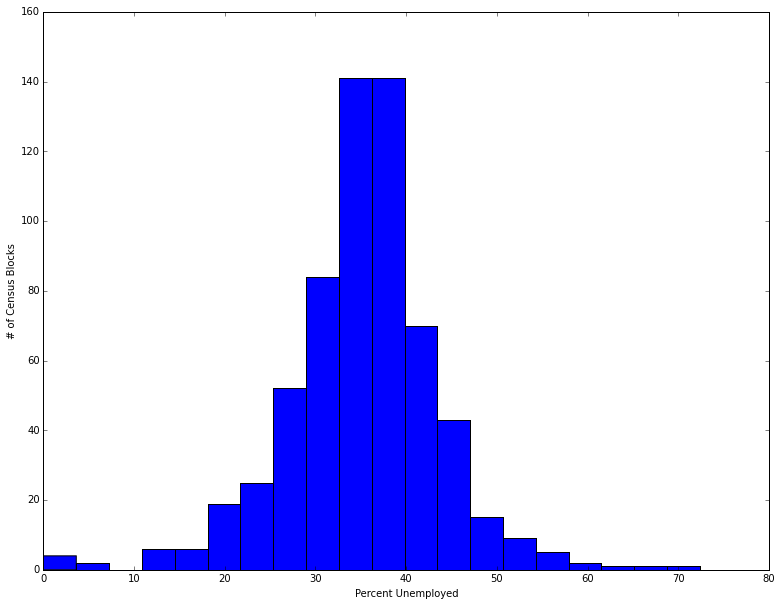

In [6]:
# plot unemployment percentage
plt.figure(figsize=(13, 10))
emp = []
for obj in employ.HC03_VC04[:-1]:
    emp.append(100-float(obj))
plt.hist(emp,bins=20)
plt.xlabel('Percent Unemployed')
plt.ylabel('# of Census Blocks')
plt.show()

In [7]:
# read in financial info
fin = pd.read_csv('data/American_FactFinder_census/ACS_14_5YR_S2503_with_ann.csv',skiprows=[1],dtype={'GEO.id2': str})
# count how many rows we got
print fin['GEO.id2'].count()
fin

628


,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC01_EST_VC03,...,HC02_EST_VC54,HC02_MOE_VC54,HC03_EST_VC54,HC03_MOE_VC54,HC01_EST_VC55,HC01_MOE_VC55,HC02_EST_VC55,HC02_MOE_VC55,HC03_EST_VC55,HC03_MOE_VC55
0,1400000US06073000100,06073000100,"Census Tract 1, San Diego County, California",1233,86,1129,94,104,67,1.6,...,0.0,3.0,9.6,14.7,0.0,2.8,(X),(X),0.0,27.9
1,1400000US06073000201,06073000201,"Census Tract 2.01, San Diego County, California",1056,53,484,81,572,87,1.2,...,0.0,7.0,0.0,5.9,3.2,3.4,(X),(X),5.9,6.0
2,1400000US06073000202,06073000202,"Census Tract 2.02, San Diego County, California",2203,150,946,173,1257,201,4.1,...,2.6,3.8,0.0,2.7,0.0,1.6,(X),(X),0.0,2.7
3,1400000US06073000300,06073000300,"Census Tract 3, San Diego County, California",2560,215,763,153,1797,237,4.3,...,0.0,4.5,5.3,4.1,1.2,1.4,(X),(X),1.7,1.9
4,1400000US06073000400,06073000400,"Census Tract 4, San Diego County, California",2232,101,437,105,1795,139,1.2,...,0.0,7.7,0.7,1.1,0.7,1.0,(X),(X),0.8,1.3
5,1400000US06073000500,06073000500,"Census Tract 5, San Diego County, California",1597,65,457,66,1140,86,2.8,...,0.0,7.4,0.7,1.1,0.4,0.6,(X),(X),0.6,0.9
6,1400000US06073000600,06073000600,"Census Tract 6, San Diego County, California",1677,125,463,97,1214,109,2.5,...,0.0,7.3,2.2,2.1,1.0,1.1,(X),(X),1.4,1.6
7,1400000US06073000700,06073000700,"Census Tract 7, San Diego County, California",2299,129,657,124,1642,165,2.7,...,2.1,3.3,0.0,2.1,2.0,2.0,(X),(X),2.7,2.7
8,1400000US06073000800,06073000800,"Census Tract 8, San Diego County, California",2321,182,564,134,1757,182,3.9,...,3.0,5.0,0.9,1.3,2.9,2.8,(X),(X),3.9,3.7
9,1400000US06073000900,06073000900,"Census Tract 9, San Diego County, California",2950,162,506,135,2444,175,3.2,...,0.0,6.7,2.1,2.6,1.3,1.5,(X),(X),1.6,1.8


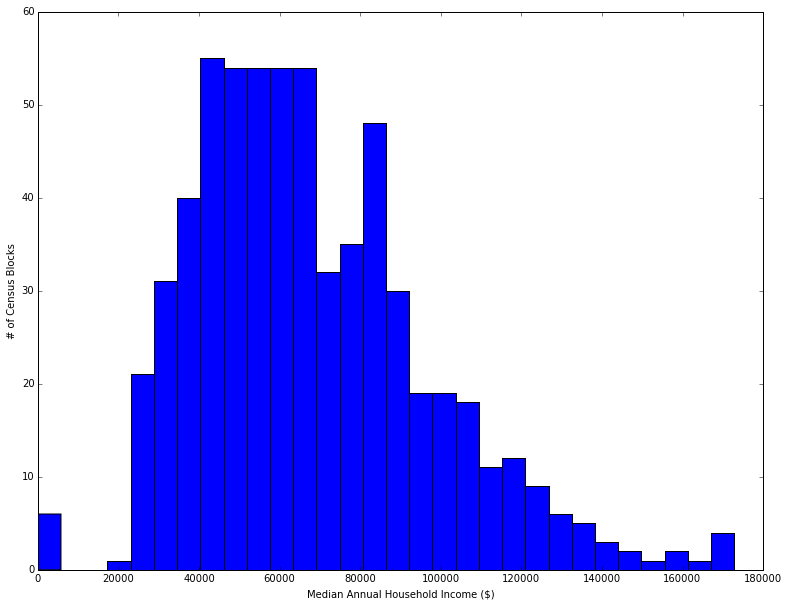

In [8]:
# plot income
plt.figure(figsize=(13, 10))
inc = []
for obj in fin.HC01_EST_VC14[:-1]:
    if obj=='-':
        obj = 0
    inc.append(float(obj))
plt.hist(inc,bins=30)
plt.xlabel('Median Annual Household Income ($)')
plt.ylabel('# of Census Blocks')
plt.show()

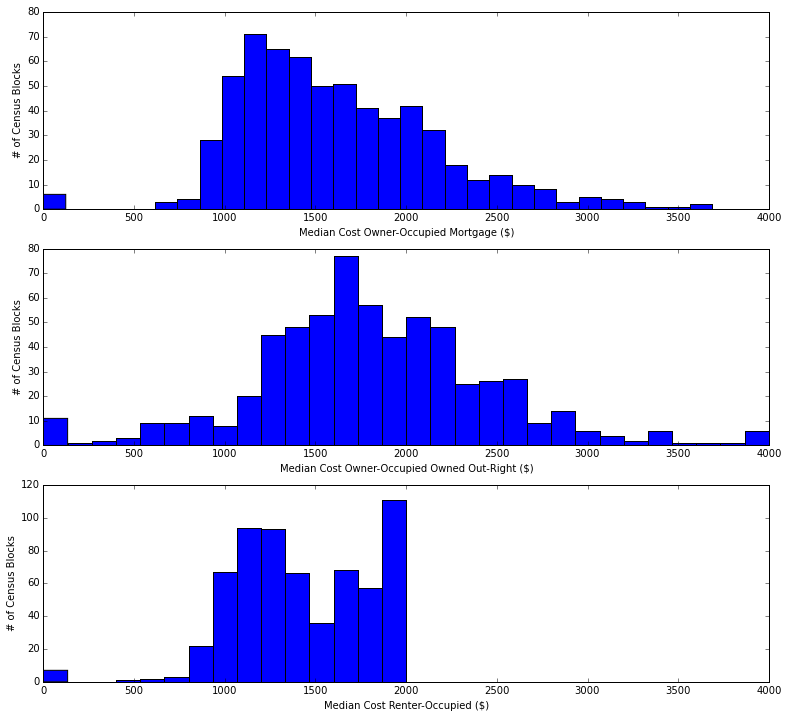

In [9]:
# plot housing costs by owner vs. renter
plt.figure(figsize=(13, 12))
ax1 = plt.subplot(311)
owner = []
for obj in fin.HC01_EST_VC31[:-1]:
    if obj=='-':
        obj = 0
    owner.append(float(obj))
plt.hist(owner,30)
plt.xlabel('Median Cost Owner-Occupied Mortgage ($)')
plt.ylabel('# of Census Blocks')
ax2 = plt.subplot(312, sharex=ax1)
owner2 = []
for obj in fin.HC02_EST_VC31[:-1]:
    if obj=='-':
        obj = 0
    if obj=='4,000+':
        obj = 4000
    owner2.append(float(obj))
plt.hist(owner2, 30)
plt.xlabel('Median Cost Owner-Occupied Owned Out-Right ($)')
plt.ylabel('# of Census Blocks')
ax3 = plt.subplot(313, sharex=ax1)
renter = []
for obj in fin.HC03_EST_VC31[:-1]:
    if obj=='-':
        obj = 0
    if obj=='2,000+':
        obj = 2000
    renter.append(float(obj))
plt.hist(renter, 15)
plt.xlabel('Median Cost Renter-Occupied ($)')
plt.ylabel('# of Census Blocks')
plt.show()

In [10]:
# make sure all 3 tables have the same rows in the same order by checking their census tract numbers
print sum(house['GEO.id2']!=employ['GEO.id2'])
print sum(house['GEO.id2']!=fin['GEO.id2'])

0
0


In [11]:
# combine all info we want to keep and give them reasonable key names
result = pd.concat([house['GEO.id2'].str[5:], \
                    house['HD01_S01'], house['HD02_S06'].replace('(X)',0), house['HD02_S07'].replace('(X)',0), \
                    house['HD02_S08'].replace('(X)',0), \
                    employ['HC03_VC04'].replace('-',0), \
                    fin['HC01_EST_VC14'].replace('-',0), fin['HC02_EST_VC14'].replace('-',0), \
                    fin['HC03_EST_VC14'].replace('-',0).replace('2,500-',2500), fin['HC01_EST_VC31'].replace('-',0).replace('4,000+',4000), \
                    fin['HC02_EST_VC31'].replace('-',0).replace('4,000+',4000), \
                    fin['HC03_EST_VC31'].replace('-',0).replace('2,000+',2000)], axis=1, \
                    keys=['census_tract','homes','homes_percent_mortgage','homes_percent_clear', 'homes_percent_rent', \
                         'employment_percent', \
                         'income_med','income_med_owner','income_med_renter', \
                         'cost_med','cost_med_owner','cost_med_renter'])
#result.to_csv('data_final/sd_housing_employment_income_cleaned.csv',na_rep='0',index=False)
result

,census_tract,homes,homes_percent_mortgage,homes_percent_clear,homes_percent_rent,employment_percent,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter
0,000100,1397,58.9,23.1,18.0,54.6,106406,115066,27813,1895,1923,1839
1,000201,1047,34.1,11.1,54.8,69.2,97976,157500,42891,1338,2243,974
2,000202,2413,32.7,9.5,57.8,75.0,75019,96000,60116,1559,2026,1445
3,000300,3136,21.5,6.6,71.9,71.2,61679,113047,51125,1394,2310,1282
4,000400,2288,12.2,3.4,84.4,75.4,68488,79911,67693,1299,1870,1255
5,000500,1726,26.7,8.1,65.2,79.8,54908,84271,50074,1224,1819,1145
6,000600,1984,23.4,6.6,70.1,77.5,55915,80417,53162,1216,1587,1181
7,000700,2479,20.1,5.2,74.7,74.9,68977,116372,61905,1347,2417,1241
8,000800,2663,23.3,5.5,71.2,72.0,45169,92321,40757,1093,1808,1011
9,000900,3141,13.4,1.5,85.1,79.4,46079,62500,43361,1056,1804,995
